In [79]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata

In [58]:
data = pd.read_csv("AllData.csv")
data

,deltaT,N,A50mean,A50std,AstdMean,fitAmpMean,fitAmpStd,fitAmpStdMean,D50mean,D50std,DstdMean,fitDecayMean,fitDecayStd,fitDecayStdMean
0,0.01,1000.0,1.226970,0.561849,1.950625,1.025491,0.506729,4.605156,1.000296,0.045294,0.045095,1.204249,1.442241,0.000229
1,0.01,10000.0,1.012949,0.140476,0.162224,0.977814,0.183878,0.014647,0.999583,0.014475,0.014194,1.108982,0.700889,0.024824
2,0.01,200.0,1.273330,0.820522,3.079092,0.991210,0.857039,42.887082,0.991363,0.101231,0.100786,1.645193,5.419926,0.000229
3,0.01,2000.0,1.124885,0.377823,1.036267,0.991187,0.393966,5.928351,0.999653,0.031994,0.031832,1.305932,1.663920,0.000239
4,0.01,500.0,1.306166,0.675292,2.681947,1.027891,0.636475,0.022177,0.996642,0.064463,0.063673,1.233736,4.998894,1.136158
5,0.01,5000.0,1.061671,0.220864,0.305691,0.995121,0.277234,0.020158,0.999933,0.019894,0.020108,1.217753,1.241088,0.042086
6,0.05,100.0,1.329876,0.685443,2.730507,1.050860,0.617760,0.040303,0.983303,0.140496,0.145748,1.016742,1.312894,0.094226
7,0.05,1000.0,1.053697,0.217853,0.303861,1.020363,0.217769,0.617250,0.996287,0.045698,0.045768,1.022512,0.423441,0.001073
8,0.05,10000.0,1.001507,0.061251,0.064718,0.997730,0.065187,0.179237,0.999255,0.013831,0.014450,1.002158,0.119458,0.000290
9,0.05,200.0,1.267511,0.572643,2.030901,1.065551,0.499403,0.050848,0.997952,0.103932,0.103524,1.111056,1.262197,0.084434


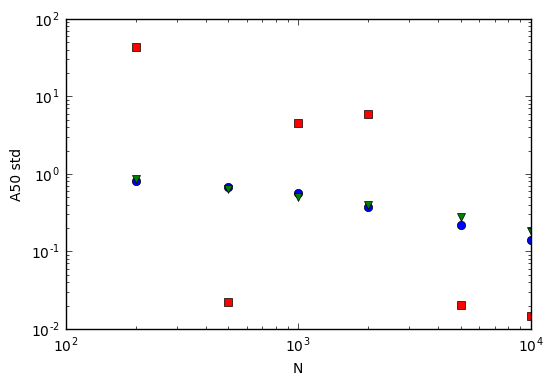

In [59]:
data1em3 = data[data['deltaT']==0.01]
plt.loglog(data1em3['N'],data1em3['A50std'], "o")
plt.loglog(data1em3['N'],data1em3['fitAmpStd'],"v")
plt.loglog(data1em3['N'],data1em3['fitAmpStdMean'],"s")
plt.ylabel("A50 std")
plt.xlabel("N")

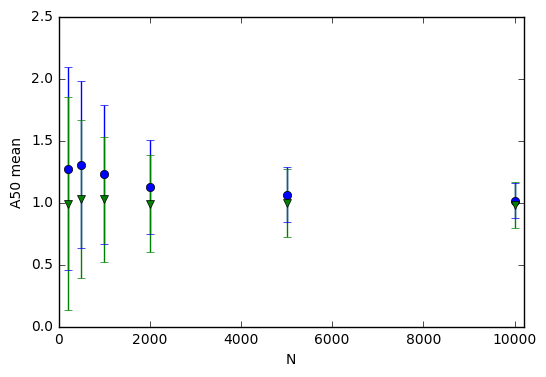

In [60]:
plt.errorbar(data1em3['N'],data1em3['A50mean'], yerr=data1em3['A50std'], fmt="o")
plt.errorbar(data1em3['N'],data1em3['fitAmpMean'], yerr=data1em3['fitAmpStd'], fmt="v")
plt.xlim((0,10200))
plt.ylabel("A50 mean")
plt.xlabel("N")

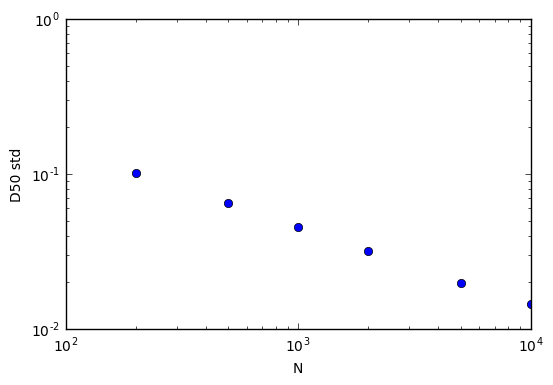

In [61]:
plt.loglog(data1em3['N'],data1em3['D50std'], "o")
plt.ylabel("D50 std")
plt.xlabel("N")

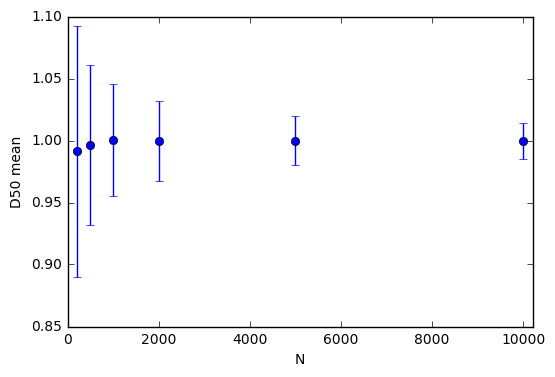

In [62]:
plt.errorbar(data1em3['N'],data1em3['D50mean'], yerr=data1em3['D50std'], fmt="o")
plt.xlim((0,10200))
plt.ylabel("D50 mean")
plt.xlabel("N")

In [70]:
data_multi = data.set_index(['deltaT','N']).sort_index()

In [71]:
data_multi

A50mean    A50std  AstdMean  fitAmpMean  fitAmpStd  \
deltaT N                                                              
0.01   200.0    1.273330  0.820522  3.079092    0.991210   0.857039   
       500.0    1.306166  0.675292  2.681947    1.027891   0.636475   
       1000.0   1.226970  0.561849  1.950625    1.025491   0.506729   
       2000.0   1.124885  0.377823  1.036267    0.991187   0.393966   
       5000.0   1.061671  0.220864  0.305691    0.995121   0.277234   
       10000.0  1.012949  0.140476  0.162224    0.977814   0.183878   
0.05   100.0    1.329876  0.685443  2.730507    1.050860   0.617760   
       200.0    1.267511  0.572643  2.030901    1.065551   0.499403   
       500.0    1.089346  0.322628  0.773483    1.008085   0.302399   
       1000.0   1.053697  0.217853  0.303861    1.020363   0.217769   
       2000.0   1.029952  0.148602  0.167018    1.014083   0.153104   
       5000.0   1.008349  0.092923  0.094564    1.001394   0.096551   
       10000.0  1.001507  0.061251  0.064718    0.997730   0.065187   
0.10   200.0    1.130864  0.371495  1.078487    1.006398   0.365321   
       500.0    1.045249  0.217373  0.300520    0.966724   0.285172   
       1000.0   1.013208  0.142782  0.162376    0.974980   0.177216   
       2000.0   1.011084  0.102418  0.106965    0.993369   0.124643   
       5000.0   1.002933  0.065454  0.064476    0.996267   0.088495   
       10000.0  1.003177  0.043824  0.045085    0.995702   0.075037   
0.20   100.0    1.140054  0.404204  1.140380    0.998840   0.354456   
       200.0    1.050489  0.249551  0.408703    0.987196   0.252185   
       500.0    1.020837  0.143181  0.166397    0.996570   0.156468   
       1000.0   1.006157  0.102921  0.107398    0.994269   0.110987   
       2000.0   1.003059  0.069991  0.073434    0.997725   0.075619   
       5000.0   1.003692  0.045168  0.045651    1.001472   0.049974   
       10000.0  1.000634  0.030523  0.031953    0.999303   0.034424   

                fitAmpStdMean   D50mean    D50std  DstdMean  fitDecayMean  \
deltaT N                                                                    
0.01   200.0        42.887082  0.991363  0.101231  0.100786      1.645193   
       500.0         0.022177  0.996642  0.064463  0.063673      1.233736   
       1000.0        4.605156  1.000296  0.045294  0.045095      1.204249   
       2000.0        5.928351  0.999653  0.031994  0.031832      1.305932   
       5000.0        0.020158  0.999933  0.019894  0.020108      1.217753   
       10000.0       0.014647  0.999583  0.014475  0.014194      1.108982   
0.05   100.0         0.040303  0.983303  0.140496  0.145748      1.016742   
       200.0         0.050848  0.997952  0.103932  0.103524      1.111056   
       500.0         0.909083  0.996960  0.064156  0.064994      1.008106   
       1000.0        0.617250  0.996287  0.045698  0.045768      1.022512   
       2000.0        0.013820  0.999555  0.032186  0.032404      1.012018   
       5000.0        0.252455  1.000103  0.021229  0.020475      1.008241   
       10000.0       0.179237  0.999255  0.013831  0.014450      1.002158   
0.10   200.0         1.331011  0.995251  0.102490  0.105373      1.210726   
       500.0         0.057400  0.997141  0.064090  0.066148      1.182890   
       1000.0        0.041771  0.997760  0.045820  0.046639      1.132522   
       2000.0        0.500572  0.998352  0.031760  0.032925      1.063345   
       5000.0        0.020103  0.999777  0.021472  0.020831      1.008020   
       10000.0       0.216211  0.999977  0.014926  0.014721      1.010613   
0.20   100.0         0.916885  0.977115  0.152791  0.157234      1.248924   
       200.0         0.596587  0.991265  0.104589  0.111066      1.112419   
       500.0         0.044704  0.995858  0.069942  0.069770      1.043979   
       1000.0        0.031284  0.999228  0.047236  0.049338      1.014103   
       2000.0        0.022229  0.998751  0.036103  0.034783      1.006245   
       5000.0        0.014

In [74]:
data_multi['A50std']

deltaT  N      
0.01    200.0      0.820522
        500.0      0.675292
        1000.0     0.561849
        2000.0     0.377823
        5000.0     0.220864
        10000.0    0.140476
0.05    100.0      0.685443
        200.0      0.572643
        500.0      0.322628
        1000.0     0.217853
        2000.0     0.148602
        5000.0     0.092923
        10000.0    0.061251
0.10    200.0      0.371495
        500.0      0.217373
        1000.0     0.142782
        2000.0     0.102418
        5000.0     0.065454
        10000.0    0.043824
0.20    100.0      0.404204
        200.0      0.249551
        500.0      0.143181
        1000.0     0.102921
        2000.0     0.069991
        5000.0     0.045168
        10000.0    0.030523
Name: A50std, dtype: float64

In [82]:
d = np.array(data['deltaT'])
N = np.array(np.log10(data['N']))
A = np.array(data['A50std'])

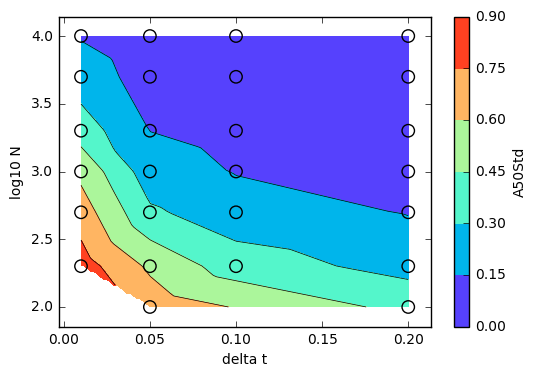

In [95]:
di,Ni = np.mgrid[min(d):max(d):100j,min(N):max(N):100j]
Ai = griddata((N,d),A,(Ni,di))

CS = plt.contour(di,Ni,Ai,5,linewidths=0.5,colors='k')
CS = plt.contourf(di,Ni,Ai,5,cmap=plt.cm.rainbow)
                  
cbar=plt.colorbar() # draw colorbar
cbar.set_label('A50Std')
plt.scatter(d,N,s=80,marker='o',facecolor="none",edgecolor='k')
plt.ylabel('log10 N')
plt.xlabel('delta t')


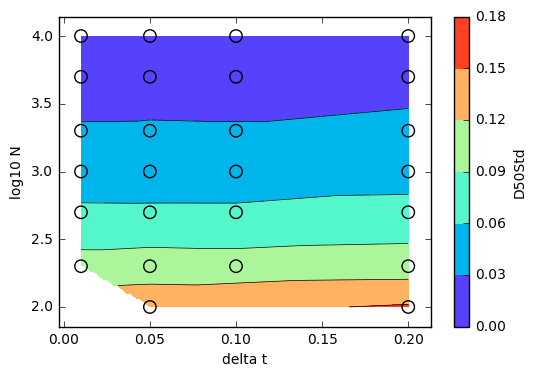

In [98]:
D = np.array(data['D50std'])
Di = griddata((N,d),D,(Ni,di))

CS = plt.contour(di,Ni,Di,5,linewidths=0.5,colors='k')
CS = plt.contourf(di,Ni,Di,5,cmap=plt.cm.rainbow)
                  
cbar=plt.colorbar() # draw colorbar
cbar.set_label('D50Std')
plt.scatter(d,N,s=80,marker='o',facecolor="none",edgecolor='k')
plt.ylabel('log10 N')
plt.xlabel('delta t')
